<h2>Decision Tree</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Content Files/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,Fare
Sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


<AxesSubplot:xlabel='Pclass'>

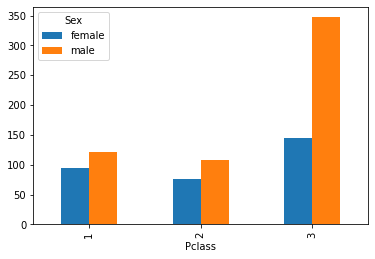

In [5]:
pd.crosstab(df.Pclass,df.Sex).plot(kind='bar')

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
df.fillna(df.Age.mean(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [10]:
df['sex_n'] = le_sex.fit_transform(df['Sex'])

In [11]:
df

,Survived,Pclass,Sex,Age,Fare,sex_n
0,0,3,male,22.000000,7.2500,1
1,1,1,female,38.000000,71.2833,0
2,1,3,female,26.000000,7.9250,0
3,1,1,female,35.000000,53.1000,0
4,0,3,male,35.000000,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,1
887,1,1,female,19.000000,30.0000,0
888,0,3,female,29.699118,23.4500,0
889,1,1,male,26.000000,30.0000,1


In [12]:
X = df.drop(['Sex','Survived'],axis='columns')
X

,Pclass,Age,Fare,sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [13]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [15]:
len(X_train)

712

In [16]:
len(X_test)

179

In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [20]:
y_test

559    1
741    0
872    0
12     0
596    1
      ..
606    0
519    0
442    0
358    1
399    1
Name: Survived, Length: 179, dtype: int64

In [21]:
model.score(X_test,y_test)

0.7988826815642458